In [35]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [36]:
from keras.datasets import mnist

In [37]:
(X_train, y_train), (X_test, y_test) = mnist.load_data('/tmp/mnist.npz')

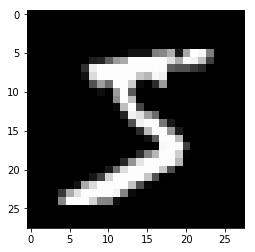

In [38]:
plt.imshow(X_train[0], cmap='gray')

In [39]:
X_train.shape

(60000, 28, 28)

In [40]:
# Reshaping the training data to have to have only 2 dimensions
X_train = X_train.reshape(-1, 28 * 28)
X_test = X_test.reshape(-1, 28 * 28)

In [41]:
X_train.shape

(60000, 784)

In [42]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255.0
X_test /= 255.0

In [43]:
from keras.utils.np_utils import to_categorical

In [44]:
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

In [45]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [46]:
y_train_cat

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 1.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  1.,  0.]])

## Fully Connected Model

In [47]:
from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K

In [48]:
K.clear_session()

model = Sequential()
model.add(Dense(512, input_dim=28*28, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [49]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 32)                4128      
_________________________________________________________________
dense_5 (Dense)              (None, 10)                330       
Total params: 570,602
Trainable params: 570,602
Non-trainable params: 0
_________________________________________________________________


In [50]:
h = model.fit(X_train, y_train_cat, batch_size=128, epochs=10, verbose=1, validation_data=(X_test, y_test_cat))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 87us/step - loss: 0.2795 - acc: 0.9146 - val_loss: 0.1092 - val_acc: 0.9657
Epoch 2/10
60000/60000 [==============================] - 5s 81us/step - loss: 0.0963 - acc: 0.9709 - val_loss: 0.1247 - val_acc: 0.9633
Epoch 3/10
60000/60000 [==============================] - 4s 74us/step - loss: 0.0649 - acc: 0.9805 - val_loss: 0.1145 - val_acc: 0.9681
Epoch 4/10
60000/60000 [==============================] - 5s 81us/step - loss: 0.0486 - acc: 0.9855 - val_loss: 0.0739 - val_acc: 0.9798
Epoch 5/10
60000/60000 [==============================] - 5s 81us/step - loss: 0.0364 - acc: 0.9886 - val_loss: 0.0978 - val_acc: 0.9768
Epoch 6/10
60000/60000 [==============================] - 5s 82us/step - loss: 0.0310 - acc: 0.9911 - val_loss: 0.0717 - val_acc: 0.9805
Epoch 7/10
60000/60000 [==============================] - 5s 81us/step - loss: 0.0240 - acc: 0.9930 - val_loss: 0.0745 - val_acc

Text(0.5,0,u'Epochs')

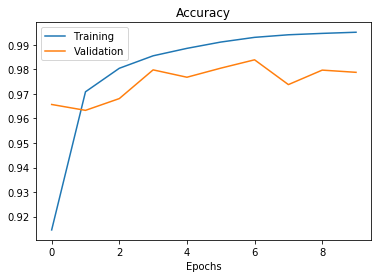

In [51]:
# plotting
# Note, if training acc is higher than val_acc, it probably means it's overfitting
plt.plot(h.history['acc'])
plt.plot(h.history['val_acc'])
plt.legend(['Training', 'Validation'])
plt.title('Accuracy')
plt.xlabel('Epochs')

In [52]:
test_accuracy = model.evaluate(X_test, y_test_cat)[0]
test_accuracy

10000/10000 [==============================] - 1s 55us/step


0.11762456628208429

## Feature Extraction?

Feature Vector
- Fourier Transform
- Wavelet
- Histogram of Oriented Gradients
- Local Binary Patterns
- Color histogram

What enables you find the local patterns?
- Convolutions => automatically detect local patterns

### Tensors

Order / Name / Exmaple / Shape

0 / Scalar / 3 / No shape

1 / Vector / [1, 0, 2] / (3, )

2 / Matrix / [[0, 1, 1], [12, 2, 3]] / (2, 3)

3 / Tensors / [[[0, 1, 5], [1, 3, 4]], [...]]]  